# Analyze words in EJMR

### References
* word frequency: https://stackoverflow.com/questions/40206249/count-of-most-popular-words-in-a-pandas-dataframe

In [15]:
import os
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
print os.getcwd()

/Users/palermospenano/Desktop/github_proj/ejmr_analysis


In [3]:
ejmr_df = pd.read_csv('./ejmr_data/ejmr_data_cleand.csv')

In [4]:
len(ejmr_df)

286116

## Word frequency

In [5]:
# remove commas from cleanTitle
ejmr_df['cleanTitle'] = ejmr_df['cleanTitle'].str.replace(',', '') 

# concatenate all rows in the cleanTitle column into one line
txt = ejmr_df['cleanTitle'].str.cat(sep=' ')

# tokenize the entire line
words = nltk.tokenize.word_tokenize(txt)

# get frequency of each word, save the top top_N in a dataframe
word_dist = nltk.FreqDist(words)
top_N = 51
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

In [6]:
rslt.head(n=51)

,Word,Frequency
0,economics,6718
1,good,6488
2,ejmr,6374
3,job,5623
4,best,5602
5,mr,5438
6,bros,5356
7,phd,5230
8,market,5028
9,vs,4803


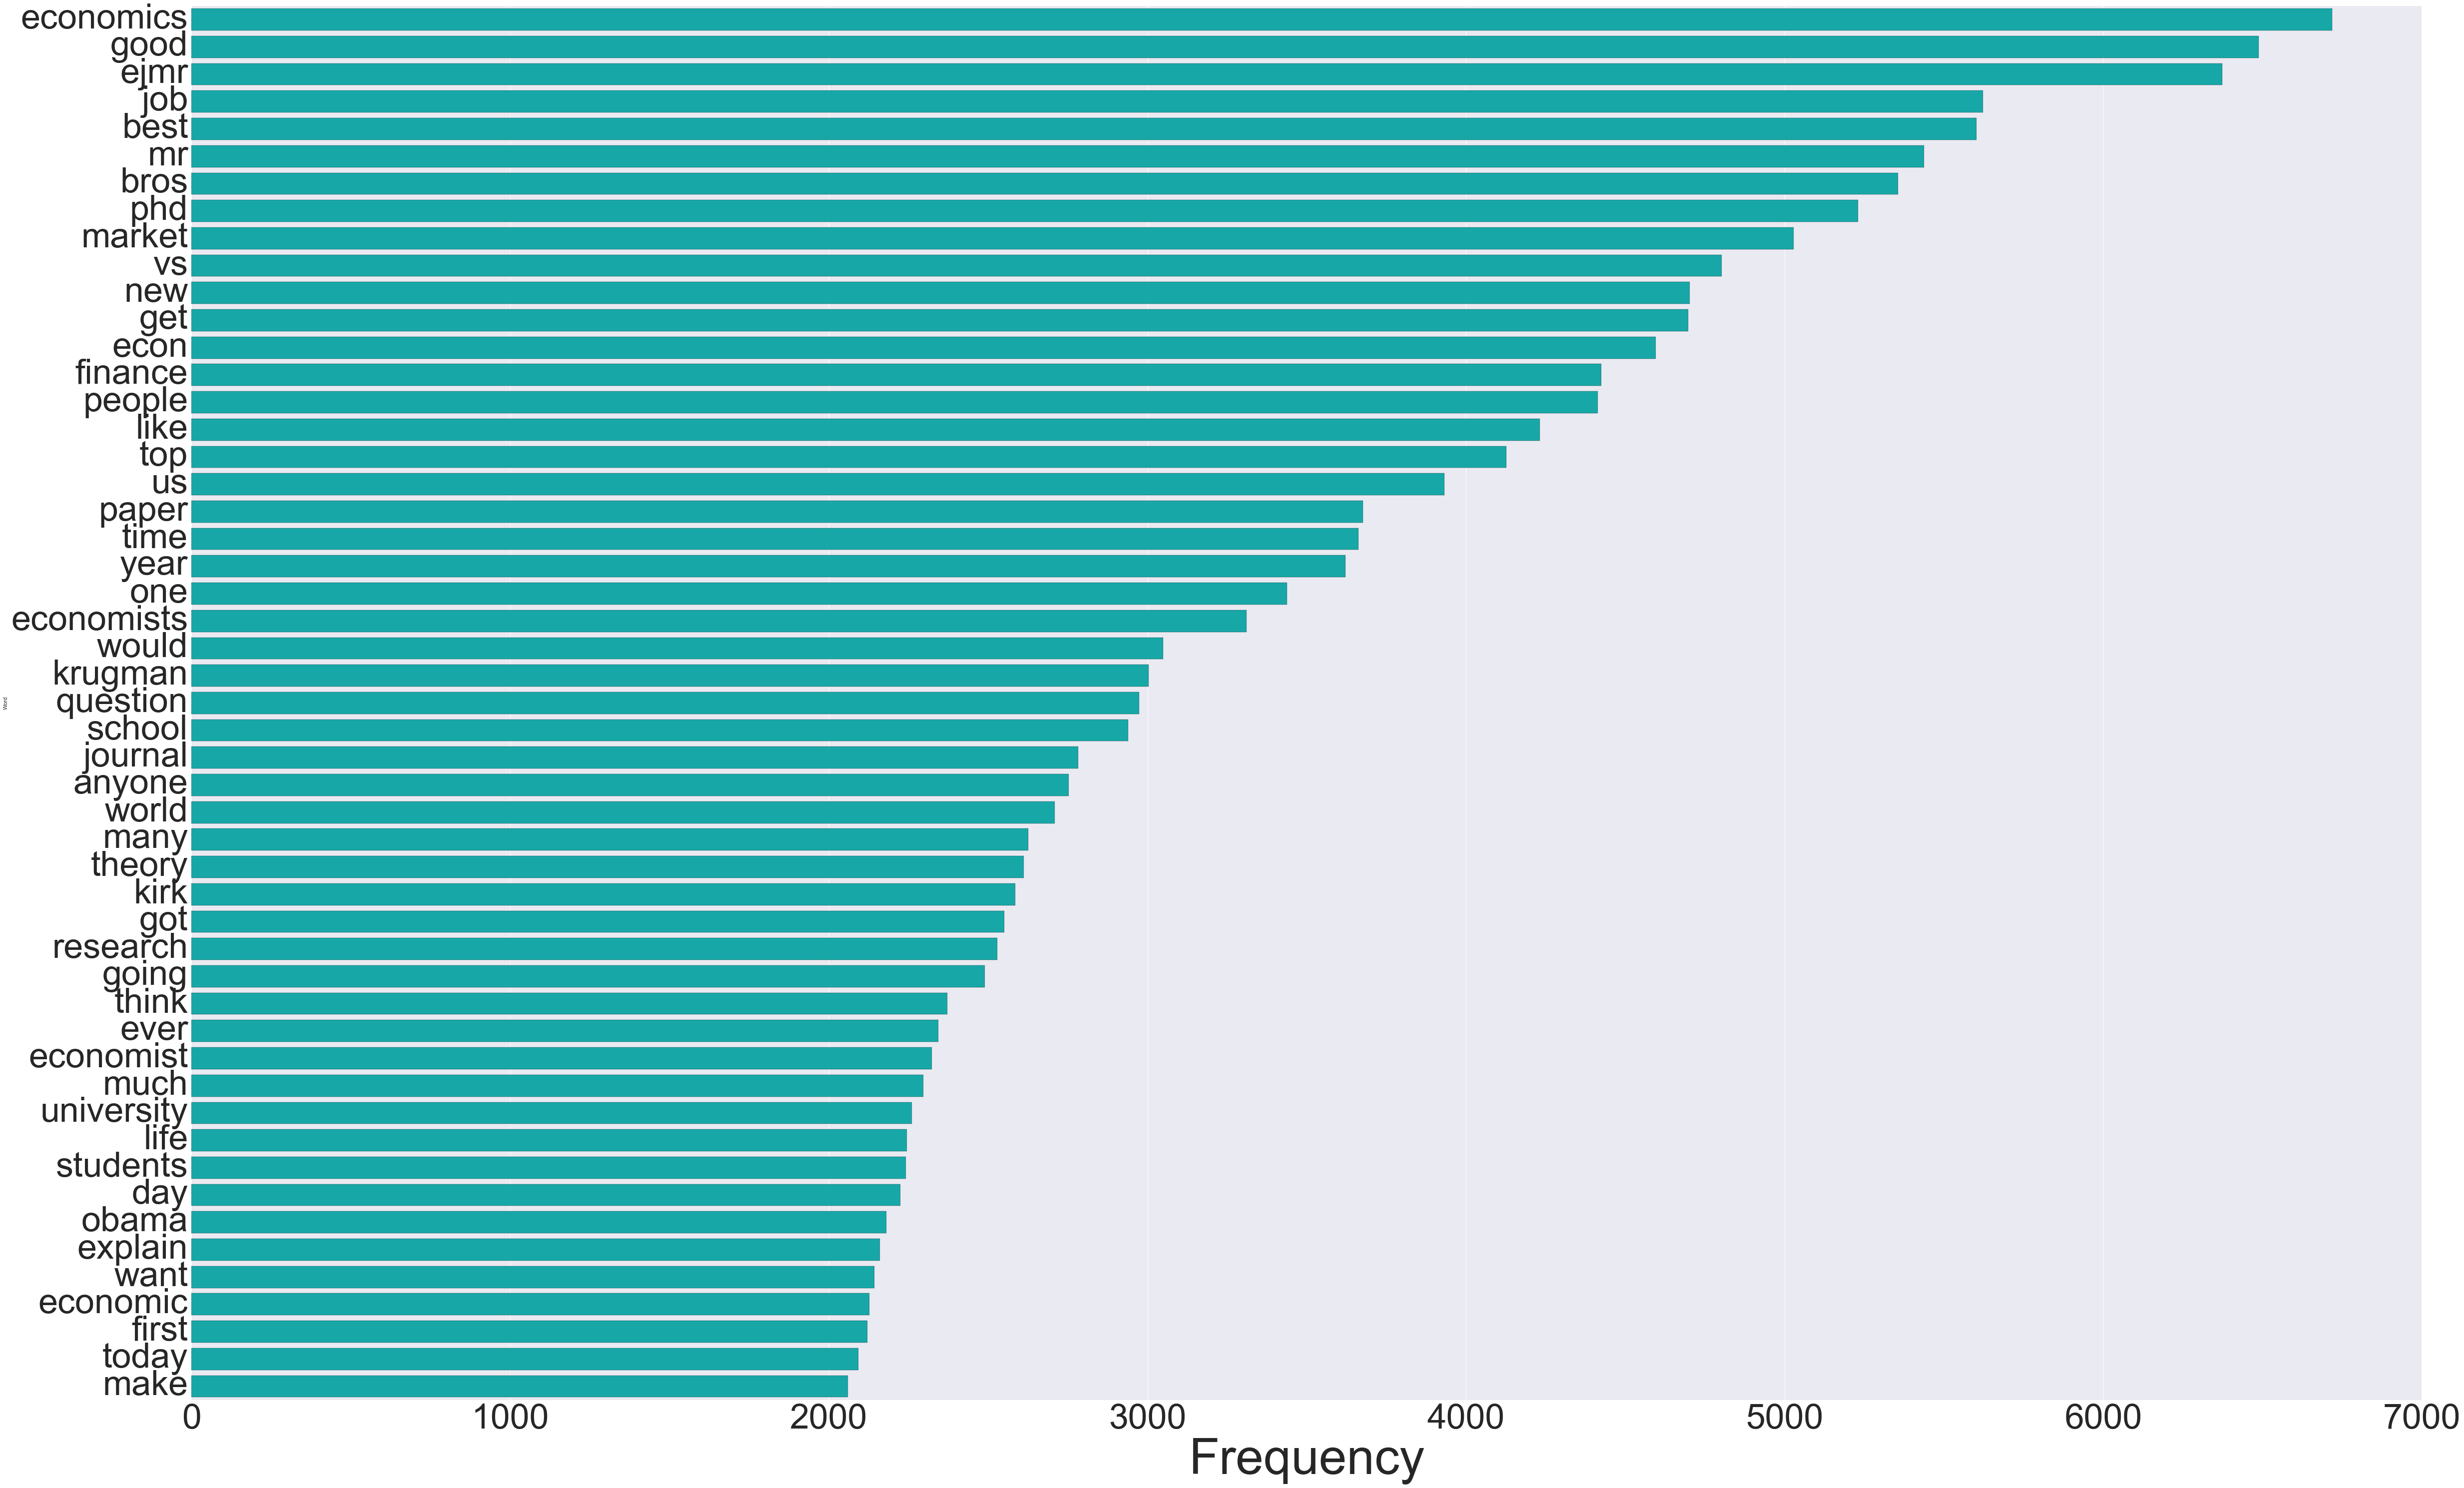

In [27]:
plt.figure(figsize=(80, 50))

ax = sns.barplot(y="Word", x="Frequency", data=rslt, color="c")
ax.set_xlabel("Frequency", fontsize=100)
ax.tick_params(labelsize=70)